# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
import classes.file_loader as file_loader
import classes.arma as arma

# Data Preprocessing

## Loading Files

In [3]:
file_path = "" # File is in the parent file
file_name = "Index.xlsx"

FileLoader = file_loader.FileLoader(file_path, file_name)

In [4]:
classic_sheet_name, precarity_sheet_name = "Classique","Précarité"

classic_raw_df, preacarity_raw_df = FileLoader.load_file(classic_sheet_name, precarity_sheet_name)

c:\Users\PC FIXE HUGO\Documents\Time_series_Prediction\classes\file_loader.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  classic_raw_df.fillna(method = "ffill", inplace=True)
c:\Users\PC FIXE HUGO\Documents\Time_series_Prediction\classes\file_loader.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  precarity_raw_df.fillna(method = "ffill", inplace=True)


In [5]:
classic_raw_df

,Date,SPOT
0,2023-04-24,7.212716
1,2023-05-01,7.321166
2,2023-05-08,7.360211
3,2023-05-15,7.380000
4,2023-05-22,7.400000
...,...,...
85,2024-12-16,7.810000
86,2024-12-23,7.970000
87,2024-12-30,7.970000
88,2025-01-06,7.970000


In [6]:
preacarity_raw_df

,Date,SPOT
0,2023-04-24,7.296783
1,2023-05-01,7.460184
2,2023-05-08,7.465385
3,2023-05-15,7.465385
4,2023-05-22,7.473191
...,...,...
85,2024-12-16,9.720000
86,2024-12-23,9.820000
87,2024-12-30,9.820000
88,2025-01-06,10.030000


## Augmented dataframes

In [7]:
augmented_classic_df = FileLoader.interpolate_dataframe(classic_raw_df)
augmented_classic_df.to_csv("augmented_classic_df.csv", index=False)
augmented_classic_df

,Date,SPOT
0,2023-04-24,7.212716
1,2023-04-25,7.333962
2,2023-04-26,7.229706
3,2023-04-27,7.235644
4,2023-04-28,7.298949
...,...,...
446,2025-01-07,7.982202
447,2025-01-08,7.986653
448,2025-01-09,7.925120
449,2025-01-10,8.000425


In [8]:
augmented_precarity_df = FileLoader.interpolate_dataframe(preacarity_raw_df)
augmented_precarity_df.to_csv("augmented_precarity_df.csv", index=False)
augmented_precarity_df

,Date,SPOT
0,2023-04-24,7.296783
1,2023-04-25,7.383141
2,2023-04-26,7.362236
3,2023-04-27,7.330283
4,2023-04-28,7.470834
...,...,...
446,2025-01-07,9.902373
447,2025-01-08,10.175597
448,2025-01-09,10.270269
449,2025-01-10,10.311250


## Plotting the augmented dataframes 

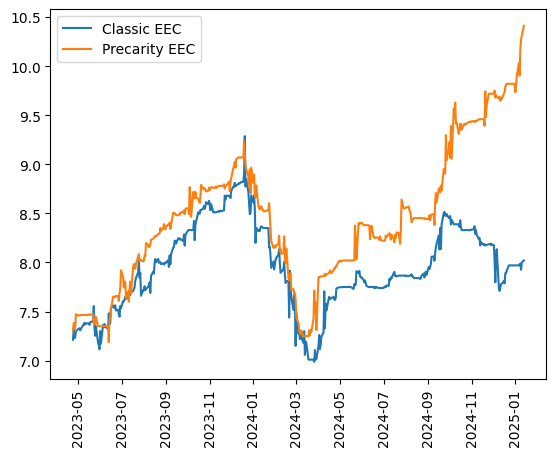

In [9]:
plt.figure()

plt.plot(augmented_classic_df["Date"], augmented_classic_df["SPOT"], label = "Classic EEC")
plt.plot(augmented_precarity_df["Date"], augmented_precarity_df["SPOT"], label = "Precarity EEC")
plt.legend()
plt.xticks(rotation = 90)

plt.show()

# Data forecasting

## Tests

### Stationnarity

From the Graph we can clearly see that the data is non stationnary. We will first differentiate the time series and check weither it has 

In [10]:
classic_df = augmented_classic_df.copy()
classic_df["Delta"] = classic_df["SPOT"] - classic_df["SPOT"].shift(1)
classic_df.dropna(inplace = True)
classic_df

,Date,SPOT,Delta
1,2023-04-25,7.333962,0.121245
2,2023-04-26,7.229706,-0.104256
3,2023-04-27,7.235644,0.005938
4,2023-04-28,7.298949,0.063305
5,2023-05-01,7.321166,0.022217
...,...,...,...
446,2025-01-07,7.982202,0.012202
447,2025-01-08,7.986653,0.004451
448,2025-01-09,7.925120,-0.061534
449,2025-01-10,8.000425,0.075305


In [11]:
result = adfuller(classic_df["Delta"], regression='c', autolag='AIC')

adf_stat, pvalue, usedlag, nobs, crit_values, icbest = result

print(f"p-value: {pvalue}")

if pvalue < 0.05:
    print("Result: reject unit root -> series is stationary (at 5% level).")
else:
    print("Result: fail to reject unit root -> series is non-stationary.")

p-value: 8.281382508302543e-06
Result: reject unit root -> series is stationary (at 5% level).


In [12]:
precarity_df = augmented_precarity_df.copy()
precarity_df["Delta"] = precarity_df["SPOT"] - precarity_df["SPOT"].shift(1)
precarity_df.dropna(inplace = True)
precarity_df

,Date,SPOT,Delta
1,2023-04-25,7.383141,0.086359
2,2023-04-26,7.362236,-0.020905
3,2023-04-27,7.330283,-0.031953
4,2023-04-28,7.470834,0.140551
5,2023-05-01,7.460184,-0.010650
...,...,...,...
446,2025-01-07,9.902373,-0.127627
447,2025-01-08,10.175597,0.273224
448,2025-01-09,10.270269,0.094672
449,2025-01-10,10.311250,0.040981


In [13]:
result = adfuller(precarity_df["Delta"], regression='c', autolag='AIC')

adf_stat, pvalue, usedlag, nobs, crit_values, icbest = result

print(f"p-value: {pvalue}")

if pvalue < 0.05:
    print("Result: reject unit root -> series is stationary (at 5% level).")
else:
    print("Result: fail to reject unit root -> series is non-stationary.")

p-value: 7.451182426654224e-13
Result: reject unit root -> series is stationary (at 5% level).


## Train-Test Split

We separate trainning and test data to test our models predictions on out of sample data.

## ARIMA

We create an ARMA model (in reality ARIMA as the series wwas already differentiated), using a class built on our own.

In [14]:
# Initiate the ARMA class
ARMA = arma.ARMA(classic_df["Delta"])

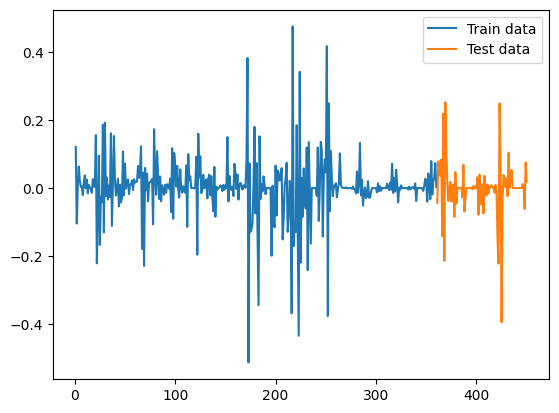

In [15]:
ARMA.train_test_split()

plt.figure()
plt.plot(ARMA.train_dependent, label="Train data")
plt.plot(ARMA.test_dependent, label="Test data")
plt.legend()
plt.show()

In [16]:
# Selecting the last relevant lags
ma_max_order = ARMA.get_ma_max_order()
ar_max_order = ARMA.get_ar_max_order()
print(f"Max MA order: {ma_max_order}, Max AR order: {ar_max_order}")

Max MA order: 1, Max AR order: 1


## LSTM

## GRU